In [1]:
import pandas as pd
df = pd.read_csv('regression_w_l_c_with_weight.csv')

In [2]:
# Keep only 'Throttle' and 'RPM' columns
df = df[['Throttle', 'RPM']]


In [3]:
df

,Throttle,RPM
0,46.101190,9531.494048
1,47.080838,9394.374251
2,48.086310,9429.505952
3,47.723404,9437.838906
4,46.830303,9427.572727
...,...,...
8306,50.872340,9382.875887
8307,43.853035,8971.025559
8308,52.931408,9461.837545
8309,47.568421,9103.670175


In [4]:
# Drop any rows with missing Throttle or RPM
df = df.dropna(subset=['Throttle', 'RPM'])

In [5]:
df

,Throttle,RPM
0,46.101190,9531.494048
1,47.080838,9394.374251
2,48.086310,9429.505952
3,47.723404,9437.838906
4,46.830303,9427.572727
...,...,...
8306,50.872340,9382.875887
8307,43.853035,8971.025559
8308,52.931408,9461.837545
8309,47.568421,9103.670175


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Define X (Throttle) and y (RPM)
X = df['Throttle'].values.reshape(-1, 1)  # Reshape needed because sklearn expects 2D input
y = df['RPM'].values

# Step 2: Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: (Optional) Print the model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Throttle → RPM): {model.coef_[0]:.2f}")


Intercept: 6603.13
Coefficient (Throttle → RPM): 56.95


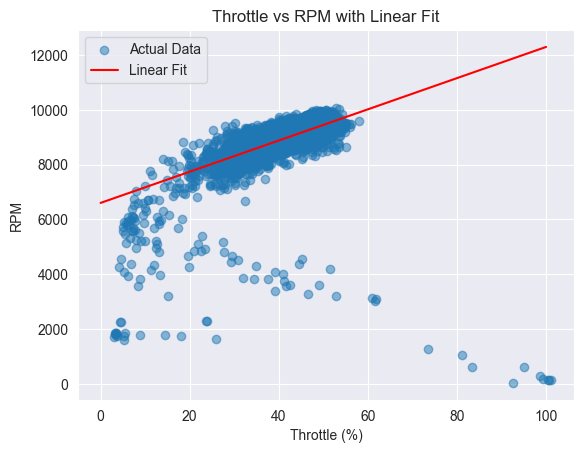

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of real data
plt.scatter(X, y, alpha=0.5, label="Actual Data")

# Regression line
throttle_range = np.linspace(0, 100, 100).reshape(-1, 1)
rpm_predicted = model.predict(throttle_range)
plt.plot(throttle_range, rpm_predicted, color='red', label="Linear Fit")

plt.xlabel('Throttle (%)')
plt.ylabel('RPM')
plt.title('Throttle vs RPM with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 1: Predict on the training data
y_pred = model.predict(X)

# Step 2: Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Step 3: Print them
print(f"R² Score (Explained Variance): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


R² Score (Explained Variance): 0.2992
Mean Squared Error (MSE): 397109.85
Mean Absolute Error (MAE): 256.75


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Expands features to [1, Throttle, Throttle^2]

# Step 2: Fit a linear regression on these polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Step 3: (Optional) Print model coefficients
print(f"Intercept: {poly_model.intercept_:.2f}")
print(f"Coefficients: {poly_model.coef_}")


Intercept: 2498.66
Coefficients: [  0.         284.56143082  -2.97284743]


In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 1: Predict RPM on training data using the quadratic model
y_poly_pred = poly_model.predict(X_poly)

# Step 2: Calculate evaluation metrics
r2 = r2_score(y, y_poly_pred)
mse = mean_squared_error(y, y_poly_pred)
mae = mean_absolute_error(y, y_poly_pred)

# Step 3: Print them
print(f"Quadratic R² Score (Explained Variance): {r2:.4f}")
print(f"Quadratic Mean Squared Error (MSE): {mse:.2f}")
print(f"Quadratic Mean Absolute Error (MAE): {mae:.2f}")

Quadratic R² Score (Explained Variance): 0.6385
Quadratic Mean Squared Error (MSE): 204852.10
Quadratic Mean Absolute Error (MAE): 237.95


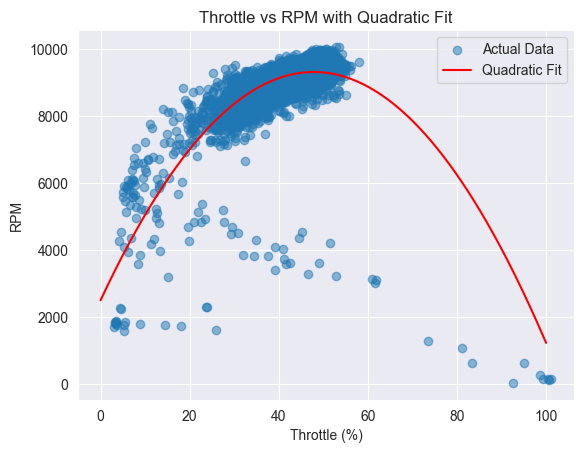

In [19]:
# Scatter plot of real data
plt.scatter(X, y, alpha=0.5, label="Actual Data")

# Regression curve
throttle_range = np.linspace(0, 100, 500).reshape(-1, 1)
throttle_range_poly = poly.transform(throttle_range)
rpm_predicted = poly_model.predict(throttle_range_poly)

plt.plot(throttle_range, rpm_predicted, color='red', label="Quadratic Fit")
plt.xlabel('Throttle (%)')
plt.ylabel('RPM')
plt.title('Throttle vs RPM with Quadratic Fit')
plt.legend()
plt.grid(True)
plt.show()

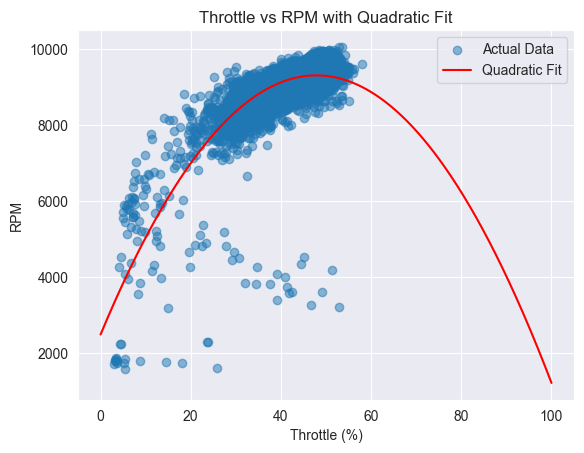

In [21]:
# Step 1: Define X (Throttle) and y (RPM)
X = df[df['Throttle']<60]['Throttle'].values.reshape(-1, 1)  # Reshape needed because sklearn expects 2D input
y = df[df['Throttle']<60]['RPM'].values

# Scatter plot of real data
plt.scatter(X, y, alpha=0.5, label="Actual Data")

# Regression curve
throttle_range = np.linspace(0, 100, 500).reshape(-1, 1)
throttle_range_poly = poly.transform(throttle_range)
rpm_predicted = poly_model.predict(throttle_range_poly)

plt.plot(throttle_range, rpm_predicted, color='red', label="Quadratic Fit")
plt.xlabel('Throttle (%)')
plt.ylabel('RPM')
plt.title('Throttle vs RPM with Quadratic Fit')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
r2_scores = []
mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(X):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Transform with polynomial features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_pred = model.predict(X_test_poly)

    # Evaluate
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# Print average metrics
print(f"Cross-validated Quadratic R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Cross-validated MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Cross-validated MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")


Cross-validated Quadratic R²: 0.6307 ± 0.0469
Cross-validated MSE: 205973.10 ± 19386.48
Cross-validated MAE: 238.11 ± 2.14


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Step 1: Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow until leaves are pure
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all cores
)

# Step 2: Cross-validate
r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Step 3: Print results
print(f"Random Forest Cross-validated R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")


Random Forest Cross-validated R²: 0.5041 ± 0.1471


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def create_discontinuous_piecewise_rpm_model(df, transition_throttle=60):
    """
    Creates a discontinuous piecewise function to model RPM as a function of throttle:
    - Either linear or quadratic fit for throttle <= transition_throttle (whichever fits better)
    - Linear fit for throttle > transition_throttle

    Parameters:
    - df: DataFrame with 'Throttle' and 'RPM' columns
    - transition_throttle: Throttle value where we switch models

    Returns:
    - Function that takes throttle value(s) and returns predicted RPM
    - R-squared score for the model
    - Dictionary with model details
    """

    # Split data into two regions
    df_low = df[df['Throttle'] <= transition_throttle]
    df_high = df[df['Throttle'] > transition_throttle]

    # Try both linear and quadratic models for low throttle region
    X_low = df_low['Throttle'].values.reshape(-1, 1)
    y_low = df_low['RPM'].values

    # Linear model
    lin_model = LinearRegression().fit(X_low, y_low)
    lin_r2 = r2_score(y_low, lin_model.predict(X_low))

    # Quadratic model
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_low)
    quad_model = LinearRegression().fit(X_poly, y_low)
    quad_r2 = r2_score(y_low, quad_model.predict(X_poly))

    # Select the better model for low throttle
    if quad_r2 > lin_r2:
        low_model = {'type': 'quadratic', 'model': quad_model, 'r2': quad_r2}
        print("Selected quadratic model for low throttle (R² = {:.2f})".format(quad_r2))
    else:
        low_model = {'type': 'linear', 'model': lin_model, 'r2': lin_r2}
        print("Selected linear model for low throttle (R² = {:.2f})".format(lin_r2))

    # Fit simple linear model for high throttle (no constraints)
    X_high = df_high['Throttle'].values.reshape(-1, 1)
    y_high = df_high['RPM'].values
    high_model = LinearRegression().fit(X_high, y_high)
    high_r2 = r2_score(y_high, high_model.predict(X_high))
    print("Linear model for high throttle (R² = {:.2f})".format(high_r2))

    # Create piecewise function
    def rpm_predictor(throttle):
        throttle = np.asarray(throttle)
        result = np.zeros_like(throttle, dtype=float)

        # Apply low throttle model
        mask_low = throttle <= transition_throttle
        if np.any(mask_low):
            if low_model['type'] == 'quadratic':
                X_poly = poly.transform(throttle[mask_low].reshape(-1, 1))
                result[mask_low] = low_model['model'].predict(X_poly)
            else:
                result[mask_low] = low_model['model'].predict(throttle[mask_low].reshape(-1, 1))

        # Apply high throttle model
        mask_high = throttle > transition_throttle
        if np.any(mask_high):
            result[mask_high] = high_model.predict(throttle[mask_high].reshape(-1, 1))

        return result if result.size > 1 else result.item()

    # Calculate overall R-squared
    y_pred = rpm_predictor(df['Throttle'])
    overall_r2 = r2_score(df['RPM'], y_pred)

    # Prepare model details
    model_details = {
        'transition_throttle': transition_throttle,
        'low_model': low_model,
        'high_model': {
            'type': 'linear',
            'model': high_model,
            'r2': high_r2
        },
        'overall_r2': overall_r2
    }

    # Print the mathematical functions
    print("\nFinal piecewise RPM function (discontinuous at {}% throttle):".format(transition_throttle))

    if low_model['type'] == 'quadratic':
        coef = low_model['model'].coef_
        intercept = low_model['model'].intercept_
        print(f"For throttle ≤ {transition_throttle}:")
        print(f"RPM = {intercept:.2f} + {coef[1]:.2f}*throttle + {coef[2]:.2f}*throttle²")
    else:
        coef = low_model['model'].coef_[0]
        intercept = low_model['model'].intercept_
        print(f"For throttle ≤ {transition_throttle}:")
        print(f"RPM = {intercept:.2f} + {coef:.2f}*throttle")

    high_coef = high_model.coef_[0]
    high_intercept = high_model.intercept_
    print(f"For throttle > {transition_throttle}:")
    print(f"RPM = {high_intercept:.2f} + {high_coef:.2f}*throttle")

    print(f"\nOverall model R-squared: {overall_r2:.4f}")

    return rpm_predictor, overall_r2, model_details

# Example usage:
# Assuming you have a DataFrame 'df' with 'Throttle' and 'RPM' columns
rpm_model, r2, details = create_discontinuous_piecewise_rpm_model(df, transition_throttle=60)

Selected quadratic model for low throttle (R² = 0.63)
Linear model for high throttle (R² = 0.91)

Final piecewise RPM function (discontinuous at 60% throttle):
For throttle ≤ 60:
RPM = 3497.86 + 219.56*throttle + -2.03*throttle²
For throttle > 60:
RPM = 7224.98 + -72.24*throttle

Overall model R-squared: 0.6972


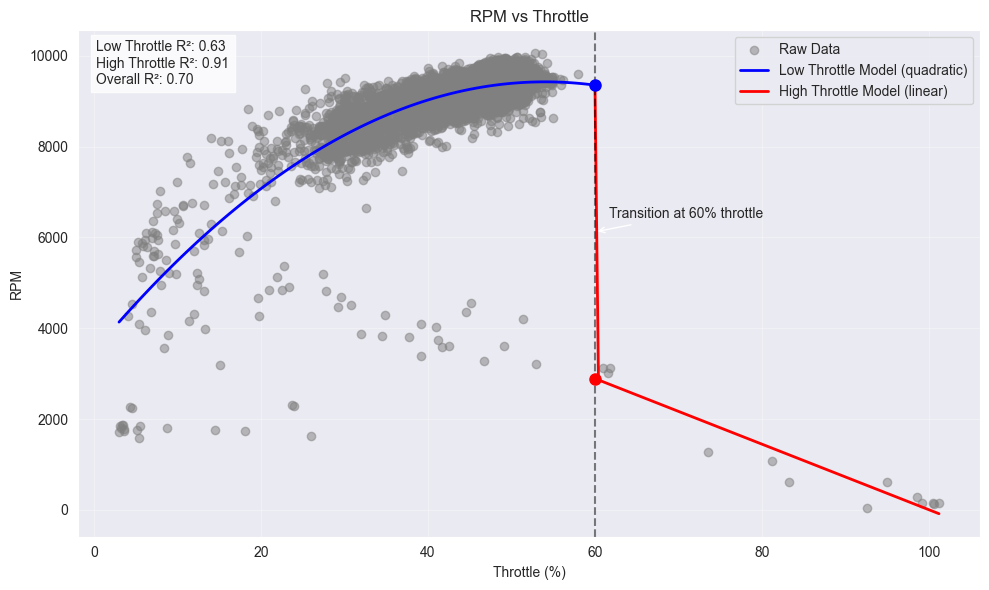

In [27]:
import matplotlib.pyplot as plt

def plot_piecewise_model(df, rpm_predictor, model_details, title="RPM vs Throttle"):
    """
    Plots the piecewise model against raw data

    Parameters:
    - df: DataFrame with 'Throttle' and 'RPM' columns
    - rpm_predictor: The prediction function returned by create_discontinuous_piecewise_rpm_model
    - model_details: The model details dictionary returned by create_discontinuous_piecewise_rpm_model
    - title: Plot title
    """
    plt.figure(figsize=(10, 6))

    # Plot raw data
    plt.scatter(df['Throttle'], df['RPM'], color='gray', alpha=0.5, label='Raw Data')

    # Generate smooth curves for model visualization
    throttle_low = np.linspace(df['Throttle'].min(), model_details['transition_throttle'], 100)
    throttle_high = np.linspace(model_details['transition_throttle'], df['Throttle'].max(), 100)

    # Predict RPM for visualization
    rpm_low = rpm_predictor(throttle_low)
    rpm_high = rpm_predictor(throttle_high)

    # Plot model curves
    plt.plot(throttle_low, rpm_low, 'b-', linewidth=2,
             label=f'Low Throttle Model ({model_details["low_model"]["type"]})')
    plt.plot(throttle_high, rpm_high, 'r-', linewidth=2,
             label='High Throttle Model (linear)')

    # Mark transition point
    transition_rpm_low = rpm_predictor(model_details['transition_throttle'])
    transition_rpm_high = rpm_predictor(model_details['transition_throttle'] + 0.001)  # Just above transition

    plt.axvline(x=model_details['transition_throttle'], color='k', linestyle='--', alpha=0.5)
    plt.plot(model_details['transition_throttle'], transition_rpm_low, 'bo', markersize=8)
    plt.plot(model_details['transition_throttle'], transition_rpm_high, 'ro', markersize=8)

    # Annotate transition point
    plt.annotate(f'Transition at {model_details["transition_throttle"]}% throttle',
                 xy=(model_details['transition_throttle'], (transition_rpm_low + transition_rpm_high)/2),
                 xytext=(10, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->"))

    # Add model details to plot
    plt.text(0.02, 0.98,
             f'Low Throttle R²: {model_details["low_model"]["r2"]:.2f}\n'
             f'High Throttle R²: {model_details["high_model"]["r2"]:.2f}\n'
             f'Overall R²: {model_details["overall_r2"]:.2f}',
             transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.xlabel('Throttle (%)')
    plt.ylabel('RPM')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you've already created the model:
# rpm_model, r2, details = create_discontinuous_piecewise_rpm_model(df, transition_throttle=60)
plot_piecewise_model(df, rpm_model, details)